- Nama : Hilmi Fawwaz Sa'ad
- NRP : 5025221103
- Kelas : Machine Learning (F)
- Dataset : PUBG dataset for #1 killplace (https://www.kaggle.com/datasets/metwallusion/pubg-dataset-for-1-killplace)

In [ ]:
# Import Lbrary

import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
# Membaca CSV

dataset_path = 'pubg_dataset_area_of_interest.csv' # Sesuaikan path berdasarkan letak datasetnya
df = pd.read_csv(dataset_path)
df

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
0,7,1120.0,8,14,3,112.50,3503.0,8
1,6,1563.0,10,13,3,270.30,3723.0,7
2,11,817.0,0,9,2,157.40,2396.0,4
3,8,623.7,4,7,2,101.30,2539.0,3
4,5,1036.0,7,6,2,75.61,3226.0,10
...,...,...,...,...,...,...,...,...
47338,2,1318.0,10,11,2,386.40,4795.0,3
47339,5,452.2,2,6,1,50.39,4178.0,5
47340,7,654.6,5,7,3,131.20,2340.0,7
47341,3,567.6,0,6,1,79.30,3103.0,4


In [ ]:
# Data terbaca hingga 37343 column/record (Min 400 dan Max 1000)
# Membaca 1000 baris pertama dari dataset

df = pd.read_csv(dataset_path, nrows=1000)
df

,boosts,damageDealt,DBNOs,kills,killStreaks,longestKill,walkDistance,weaponsAcquired
0,7,1120.0,8,14,3,112.50,3503.0,8
1,6,1563.0,10,13,3,270.30,3723.0,7
2,11,817.0,0,9,2,157.40,2396.0,4
3,8,623.7,4,7,2,101.30,2539.0,3
4,5,1036.0,7,6,2,75.61,3226.0,10
...,...,...,...,...,...,...,...,...
995,6,890.7,5,10,3,93.25,2444.0,5
996,7,661.9,5,9,2,101.10,3332.0,8
997,8,1228.0,6,11,3,377.80,2862.0,8
998,3,1100.0,9,11,3,70.68,351.4,3


# Exploratory Data Analysis (EDA)

In [ ]:
# Gambaran umum/informasi dari DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   boosts           1000 non-null   int64  
 1   damageDealt      1000 non-null   float64
 2   DBNOs            1000 non-null   int64  
 3   kills            1000 non-null   int64  
 4   killStreaks      1000 non-null   int64  
 5   longestKill      1000 non-null   float64
 6   walkDistance     1000 non-null   float64
 7   weaponsAcquired  1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [ ]:
# Cek apakah ada yang duplikat

print(df.duplicated().sum())

0


In [ ]:
# Mencari jumlah nilai unik untuk setiap fitur

columns = df.columns
for i, col in enumerate (columns):
    print (f"Columns {i} = ", df[col].nunique())

Columns 0 =  15
Columns 1 =  932
Columns 2 =  16
Columns 3 =  16
Columns 4 =  7
Columns 5 =  912
Columns 6 =  844
Columns 7 =  15


In [ ]:
# Mengetahui nilai unik fitur yang nilai uniknya kurang dari 10

for i in columns:
    if (df[i].nunique() < 10):
        print ("Feature:\t", i, "\n", df[i].unique(), "\n#########################\n")

Feature:	 killStreaks 
 [3 2 1 4 5 6 7] 
#########################



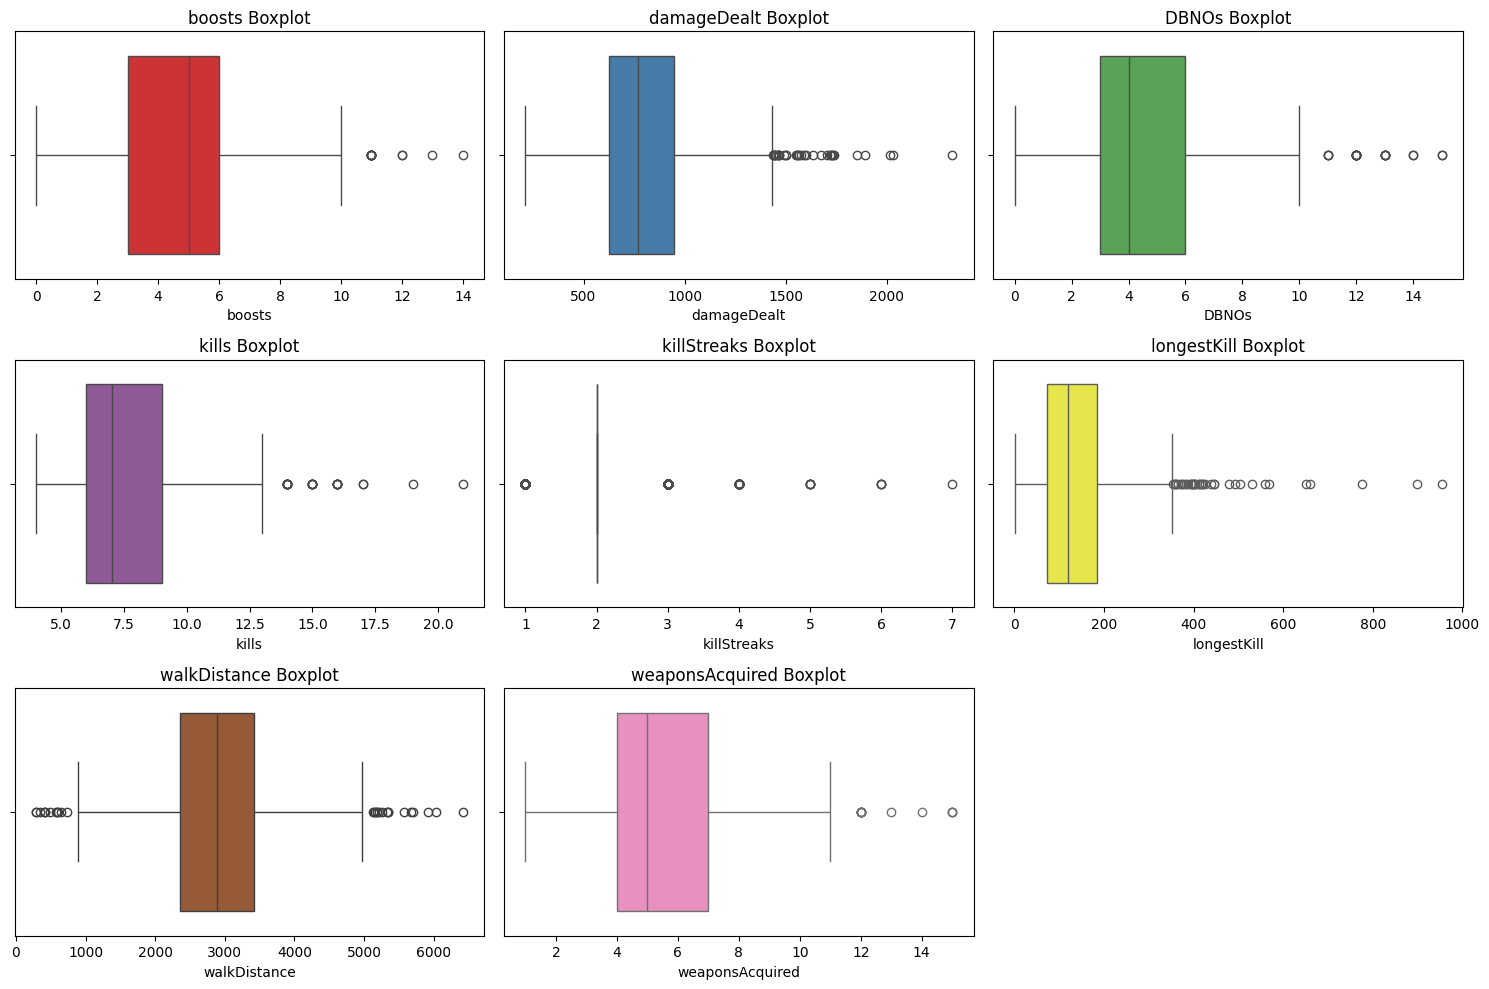

In [ ]:
# Visualisasi Boxplot

col_box = ['boosts', 'damageDealt', 'DBNOs',
          'kills', 'killStreaks', 'longestKill',
           'walkDistance', 'weaponsAcquired']
color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize = (15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box)//3)+1, 3, i)
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

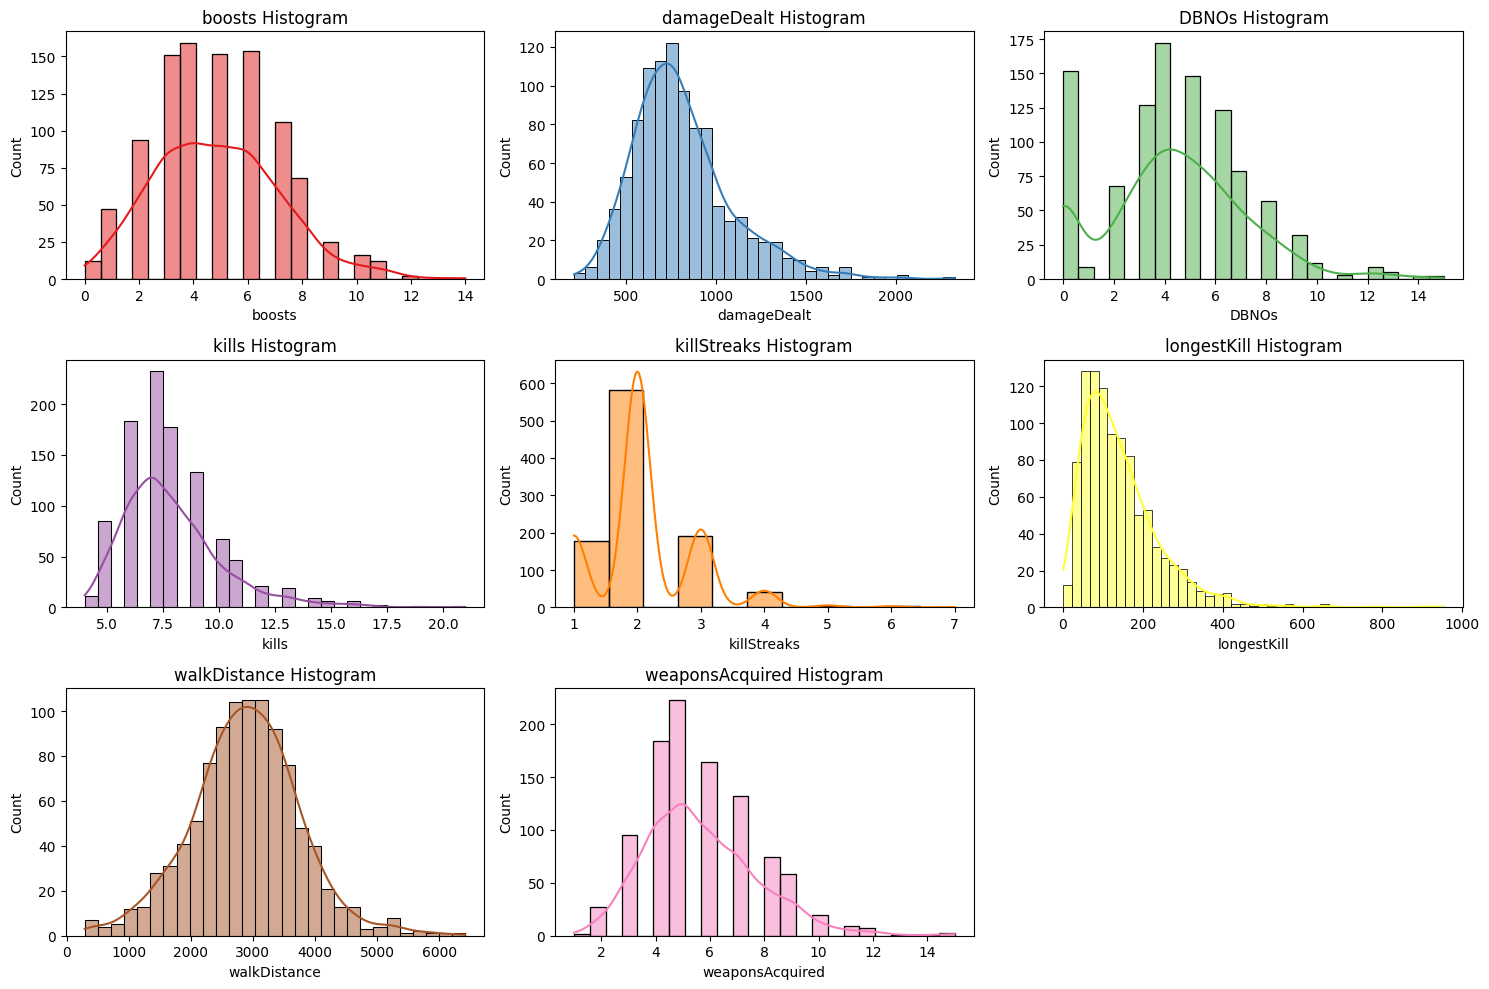

In [ ]:
# Visualisasi Histogram

col_box = ['boosts', 'damageDealt', 'DBNOs',
          'kills', 'killStreaks', 'longestKill',
           'walkDistance', 'weaponsAcquired']
color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize=(15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box) // 3) + 1, 3, i)
    sns.histplot(data=df, x=column, color=color_palette[i - 1], kde=True)
    plt.xlabel(column)
    plt.title(f'{column} Histogram')

plt.tight_layout()
plt.show()

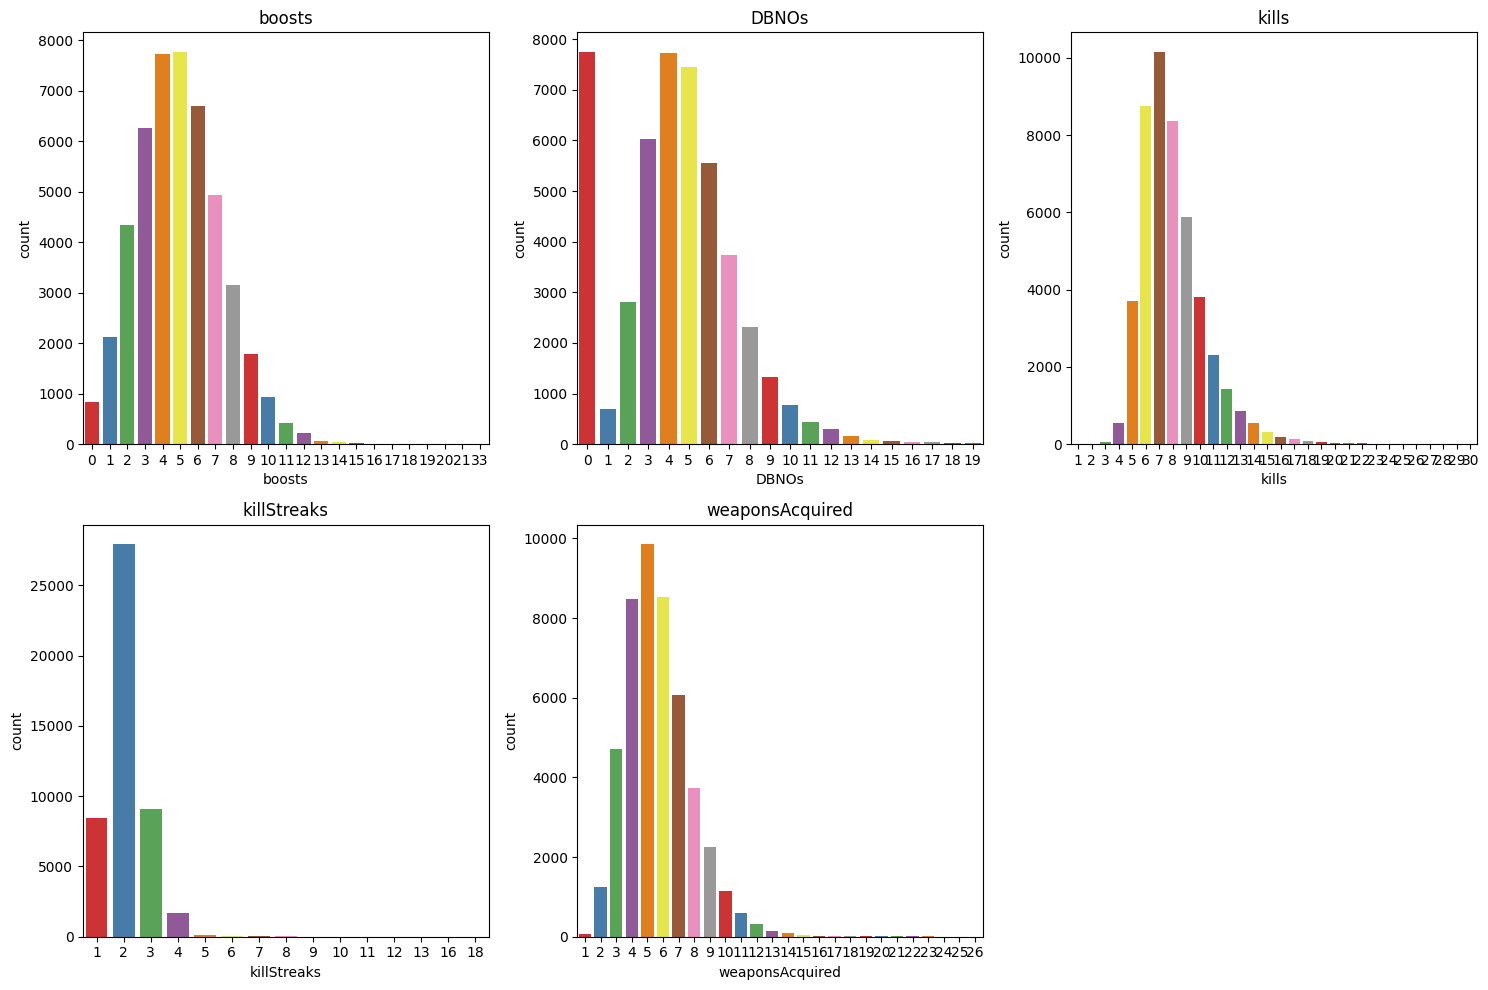

In [70]:
# Visualisasi Barplot
# Untuk damageDealt, longestKill, walkDistance tidak divisualisasikan ke barplot karena memiliki 800+ unique value

col_bar = ['boosts', 'DBNOs',
           'kills', 'killStreaks',
           'weaponsAcquired']

plt.figure(figsize=(15, 10))
for i, column in enumerate(col_bar, 1):
    plt.subplot((len(col_bar)//3)+1, 3, i)

    unique_values = df[column].nunique()
    color_palette = sns.color_palette("Set1", unique_values)

    sns.countplot(data=df, x=column, hue=column, palette=color_palette, legend=False)
    plt.title(column)

plt.tight_layout()
plt.show()

# Selection Feature & PCA (*Principal Component Analysis*)

<Axes: >

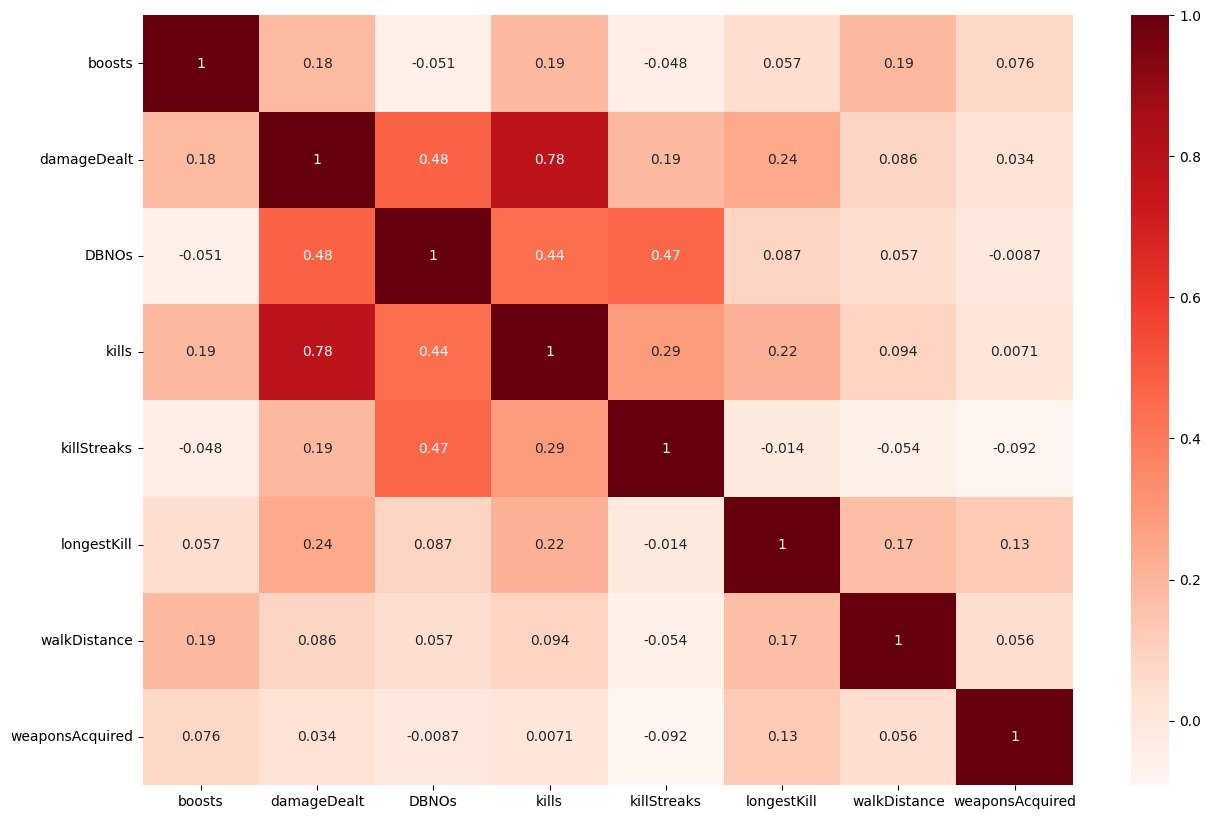

In [ ]:
# Visualisasi Heat Map

plt.figure(figsize=(15,10))
sns.heatmap(df[col_box].corr(), cmap="Reds", annot=True)

In [ ]:
# Selection Features & PCA

scaler = StandardScaler()

df_pca = df[col_box].drop(columns = ['killStreaks'])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca)
pca_data = scaler.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=["pc1", "pc2"])
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.900 0.089


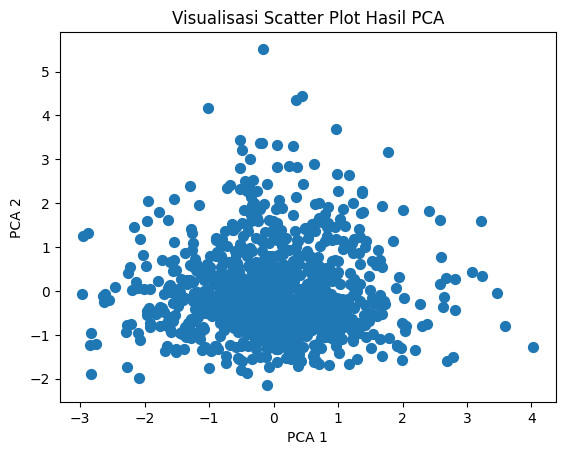

In [ ]:
# Visualisasi Scatter Plot dari PCA

plt.scatter(pca_data["pc1"], pca_data["pc2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

# K-Means Clustering

In [ ]:
# Konversi data PCA ke Numpy Array

pca_data = pca_data.values

In [ ]:
# Mencari jumlah cluster optimal

wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [1381.9673865113887]
silhoutte score for n_clusters = 2 is 0.3562437569551093
wcss score for n_cluster = 3 is [1381.9673865113887, 885.3340439468776]
silhoutte score for n_clusters = 3 is 0.3569914389605589
wcss score for n_cluster = 4 is [1381.9673865113887, 885.3340439468776, 727.6820170115731]
silhoutte score for n_clusters = 4 is 0.31277441500349135
wcss score for n_cluster = 5 is [1381.9673865113887, 885.3340439468776, 727.6820170115731, 597.8397580935883]
silhoutte score for n_clusters = 5 is 0.31893485934302207
wcss score for n_cluster = 6 is [1381.9673865113887, 885.3340439468776, 727.6820170115731, 597.8397580935883, 514.3650921151684]
silhoutte score for n_clusters = 6 is 0.32470769355358403
wcss score for n_cluster = 7 is [1381.9673865113887, 885.3340439468776, 727.6820170115731, 597.8397580935883, 514.3650921151684, 446.2562971656716]
silhoutte score for n_clusters = 7 is 0.3184624142753401
wcss score for n_cluster = 8 is [1381.9673865113887,

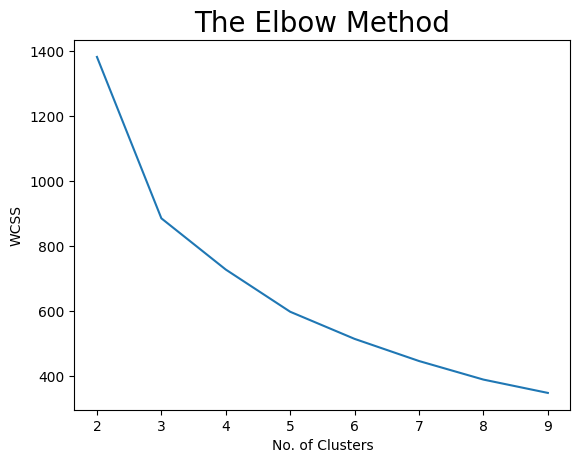

In [ ]:
# Visualisasi Elbow Method

plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

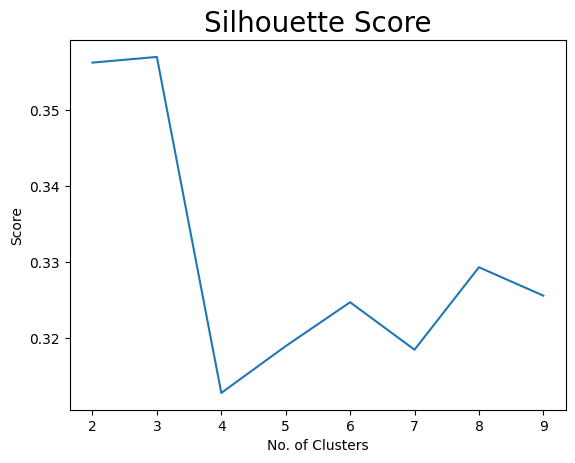

In [ ]:
# Visualisasi Silhoutte Score

plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [ ]:
# Pembuatan Model
# Berdasarkan pertimbangan Metode Siku dan Skor Siluet
# Saya akan menggunakan banyak kelompok yang terdiri dari 3

kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(pca_data)

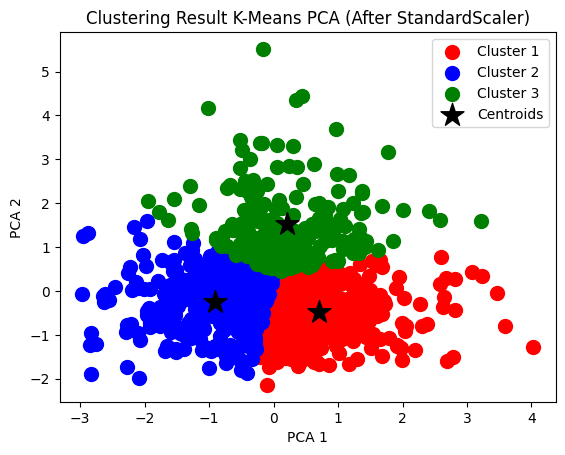

In [ ]:
# Visualisasi klaster menggunakan scatter plot

plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Menampilkan pusat klaster (centroid)
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids', marker = '*')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Hierarchical Clustering (Agglomerative Clustering)

In [ ]:
# Evaluasi clustering menggunakan Agglomerative Clustering

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(pca_data)

        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.3874382815117823
silhoutte score for n_clusters = 3 is 0.3529678128787706
silhoutte score for n_clusters = 4 is 0.30098733833281727
silhoutte score for n_clusters = 5 is 0.2881873340806328
silhoutte score for n_clusters = 6 is 0.29916460979537185
silhoutte score for n_clusters = 7 is 0.29945199993331845
silhoutte score for n_clusters = 8 is 0.30850805722064545
silhoutte score for n_clusters = 9 is 0.2844039904159399

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.36138560455834834
silhoutte score for n_clusters = 3 is 0.31263120279251905
silhoutte score for n_clusters = 4 is 0.30737752239319754
silhoutte score for n_clusters = 5 is 0.2952450480047418
silhoutte score for n_clusters = 6 is 0.29807862886743386
silhoutte score for n_clusters = 7 is 0.23503534616541202
silhoutte score for n_clusters = 8 is 0.22983864247028196
silhoutte score for n_clusters = 9 is 0.22711134726556576

#############

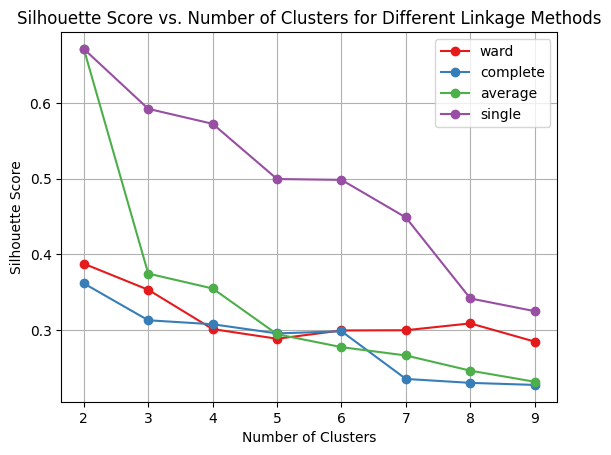

In [ ]:
# Visualisasi perbandingan Silhouette Score dari berbagai metode linkage

colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

## Complete Link

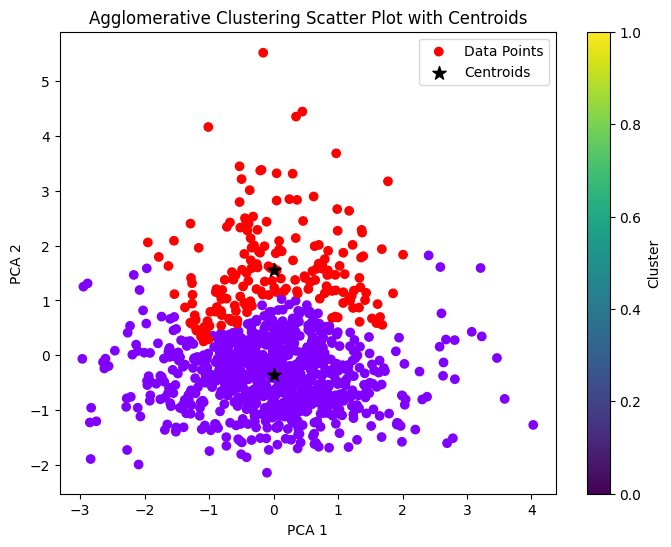

In [ ]:
# Berdasarkan hasil di atas, nilai Slhouette Score tertinggi pada k=2
# Saya akan membuat 2 cluster dengan 'complete' link

n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [ ]:
# Membuat matriks pengelompokan hierarchical clustering

linked_complete = sch.linkage(pca_data, 'complete')

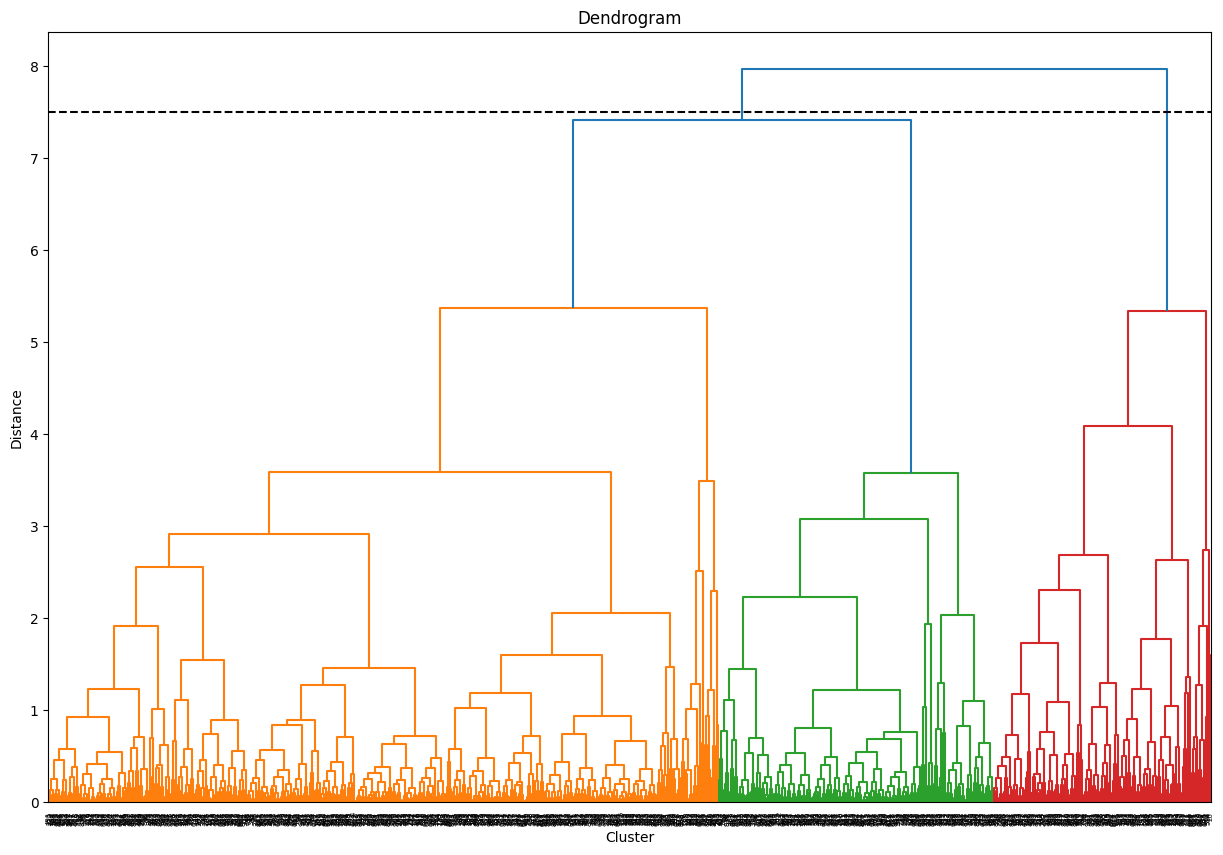

In [ ]:
# Visualisasi Dendogram

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked_complete, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=7.5, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

## Single Link

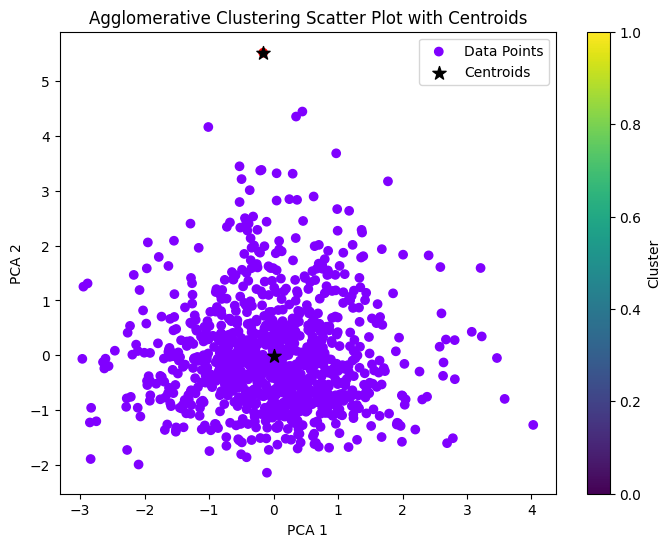

In [ ]:
# Berdasarkan hasil di atas, nilai Slhouette Score tertinggi pada k=2
# Saya akan membuat 2 cluster dengan 'single' link

n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='single')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [ ]:
# Membuat matriks pengelompokan hierarchical clustering

linked_single = sch.linkage(pca_data, 'single')

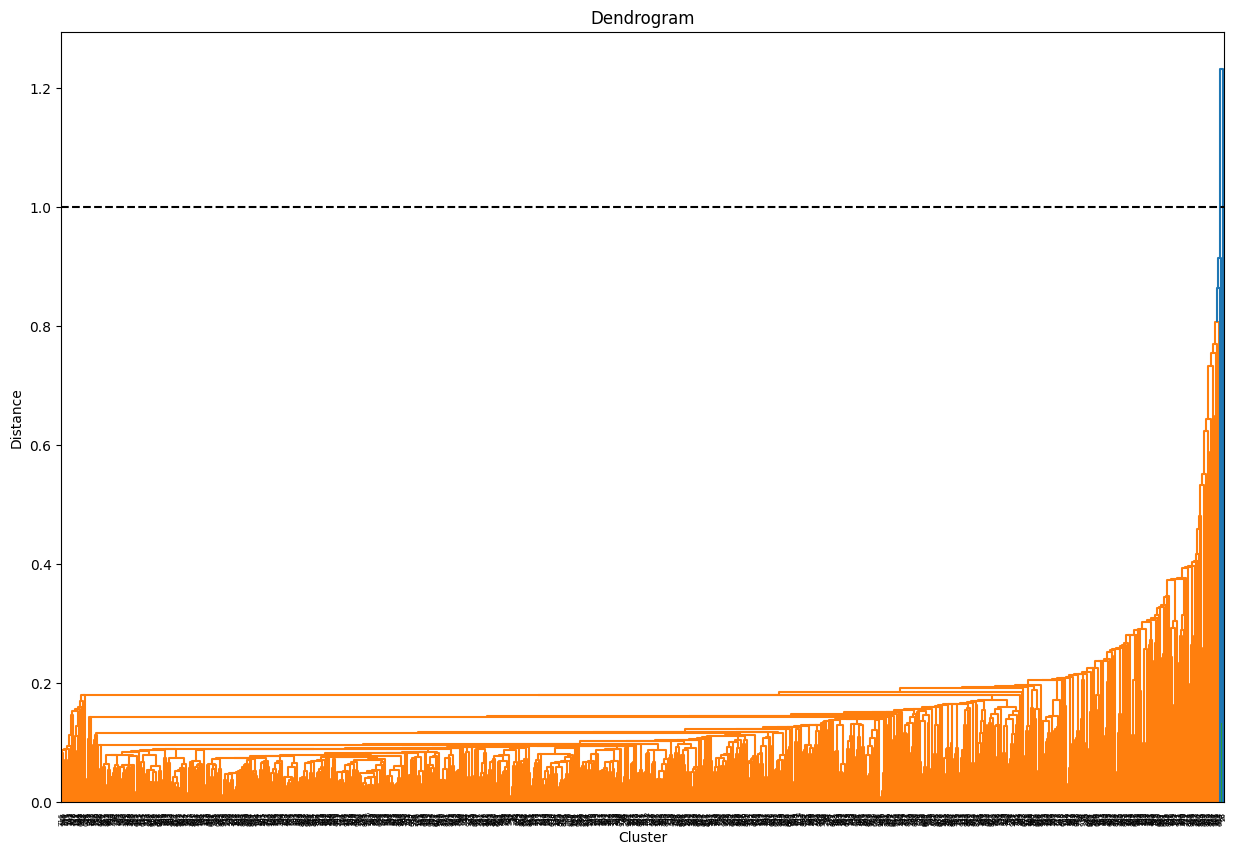

In [ ]:
# Visualisasi Dendogram

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked_single, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=1, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

## Average Link

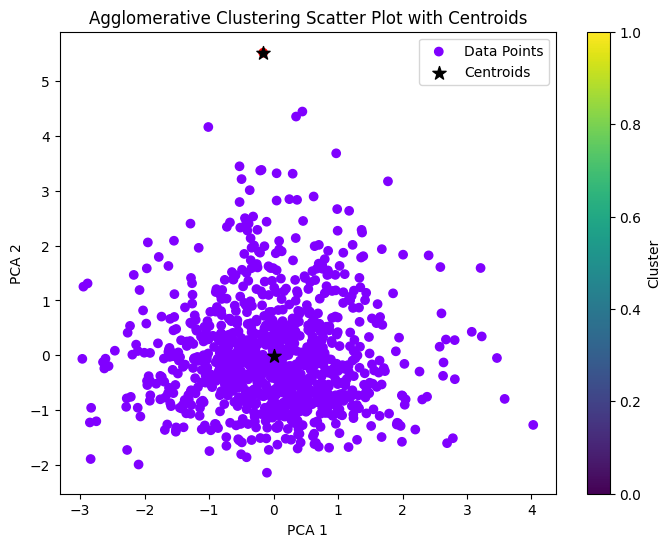

In [ ]:
# Berdasarkan hasil di atas, nilai Slhouette Score tertinggi pada k=2
# Saya akan membuat 2 cluster dengan 'average' link

n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [ ]:
# Membuat matriks pengelompokan hierarchical clustering

linked_average = sch.linkage(pca_data, 'average')

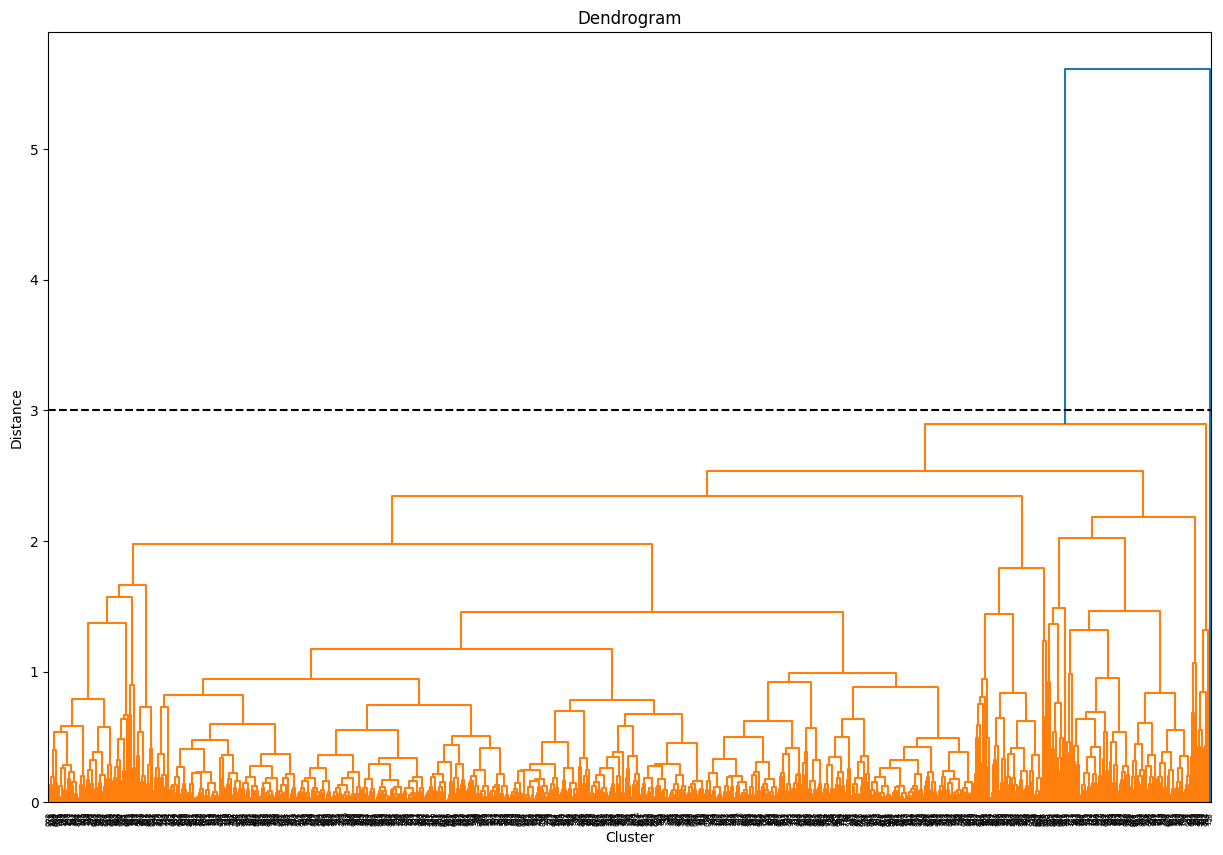

In [ ]:
# Visualisasi Dendogram

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked_average, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=3, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

## Ward Link



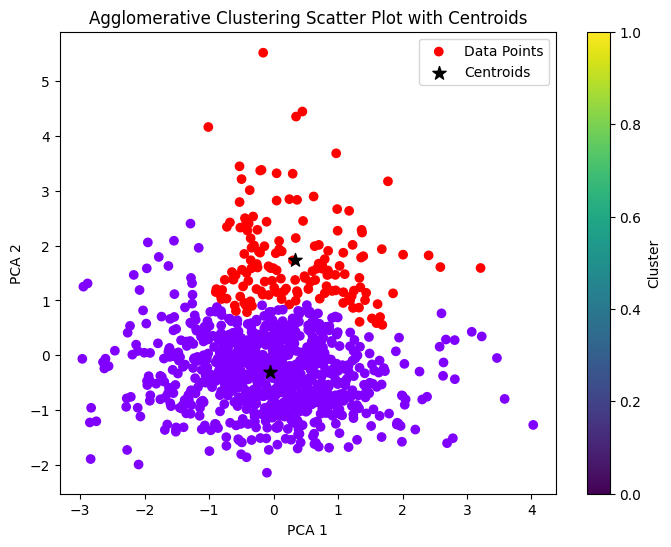

In [ ]:
# Berdasarkan hasil di atas, nilai Slhouette Score tertinggi pada k=2
# Saya akan membuat 2 cluster dengan 'complete' link

n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='ward')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [ ]:
# Membuat matriks pengelompokan hierarchical clustering

linked_ward = sch.linkage(pca_data, 'ward')

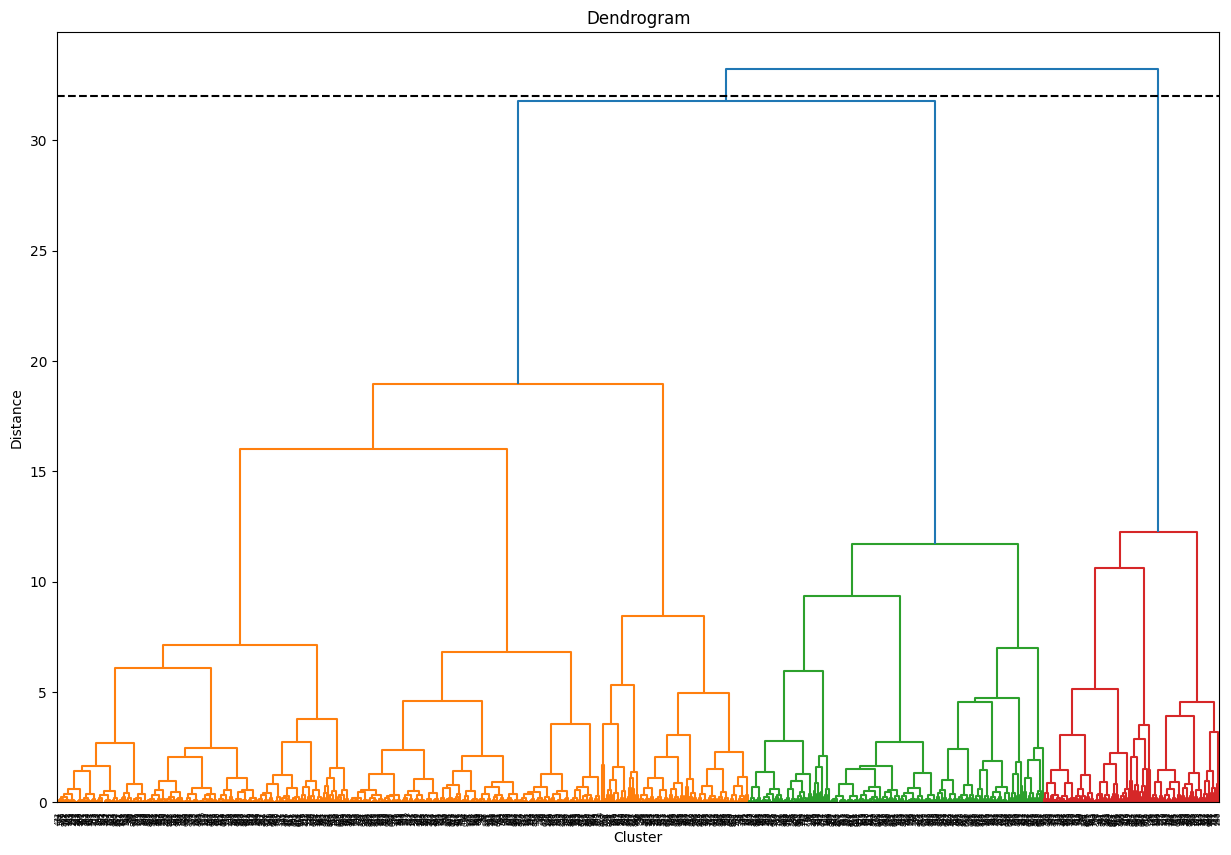

In [ ]:
# Visualisasi Dendogram

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked_ward, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=32, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()